<a href="https://colab.research.google.com/github/KimSiGyum/python2/blob/main/2%ED%95%99%EA%B8%B0_2%EC%B0%A8_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_20306%EA%B9%80%EC%8B%9C%EA%B2%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단계 1: 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 단계 2: 런타임 -런타임 재시작

In [ ]:
#한글 폰트 설정
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
#csv파일 업로드
from google.colab import files
uploaded = files.upload()


csv파일 읽어오기

In [ ]:
import csv
f = open('wind.csv', encoding = 'euc_kr')
data = csv.reader(f)
header = next(data)
data = list(data)
f.close()

### (1) 헤더와 상위 3개 데이터 출력하기

In [ ]:
print(header)
print(data[:3])

['일시', '평균풍속(m/s)', '최대풍속(m/s)', '최대풍속풍향(deg)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)']
[['1981-01-01', '4.5', '9.7', '270', '13', '250'], ['1981-01-02', '5.5', '10', '270', '11.8', '270'], ['1981-01-03', '3.9', '9.7', '270', '10.2', '270']]


###(2) 최대 순간풍속이 가장 큰 날이 언제였고 얼마였는가?

In [ ]:
# 최대 순간풍속 max
max = 0
date = ''
for row in data:
    if row[0] != '' and row[4] != '':
        row[4] = float(row[4])
        if row[4] > max:
            max = row[4]
            date = row[0]
print(f"{date}에 최대순간풍속이 {max}로 가장 컸다.")


1995-09-26에 최대순간풍속이 31.5로 가장 컸다.


### (3) 어린이날(5월 5일)과 광복절(8월 15일)의 평균 풍속을 선그래프로 비교하시오.

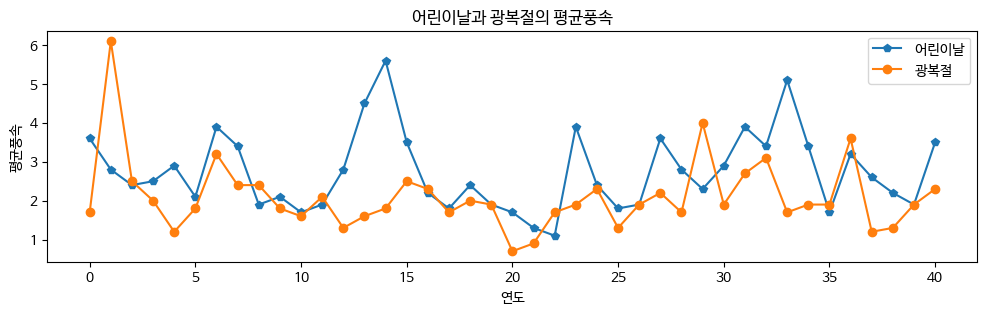

In [ ]:
children = []
liberation = []

for row in data:
    if row[0] != '' and row[1] != '':
        if row[0].split('-')[1] == '05' and row[0].split('-')[2] == '05':
            children.append(float(row[1]))
        elif row[0].split('-')[1] == '08' and row[0].split('-')[2] == '15':
            liberation.append(float(row[1]))

import matplotlib.pyplot as plt
#그래프 사이즈(12, 3)
plt.figure(figsize=(12,3))
#그래프 제목
plt.title('어린이날과 광복절의 평균풍속')
# x축 축이름 : 연도, y축 축이름 :평균풍속
plt.xlabel('연도')
plt.ylabel('평균풍속')


# 어린이날과 광복절의 선그래프 그리기, 마커모양 : 'p' , 범례: 어린이날, 광복절
plt.plot(children, marker = 'p', label = ' 어린이날')
plt.plot(liberation, marker = 'o', label = ' 광복절')


plt.legend()
plt.show()



### (4) 크리스마스의 최대 순간풍속을 막대그리프로 그리시오.

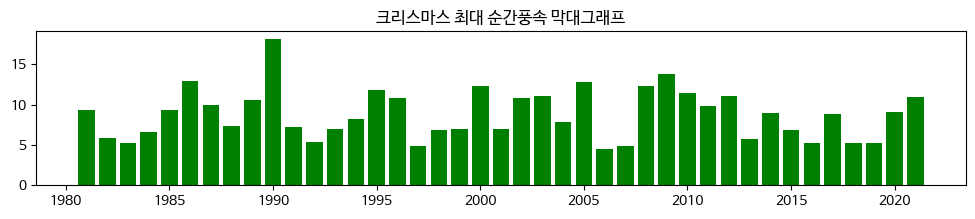

In [ ]:
#막대그래프 bar(year, christmas)
#year = [1981, 1982,..., 2021]
year = list(range(1981, 2022))
christmas = []
for row in data:
    if row[4] != '':
        if row[0].split('-')[1] == '12' and row[0].split('-')[2] == '25':
            christmas.append(float(row[4]))

#그래프 크기 (12, 2)
plt.figure(figsize=(12,2))
#그래프 제목
plt.title('크리스마스 최대 순간풍속 막대그래프')
#그래프 색 : green
plt.bar(year, christmas, color = 'g')

plt.show()



### (5) 최대풍속풍향을 히스토그램으로 그리시오.

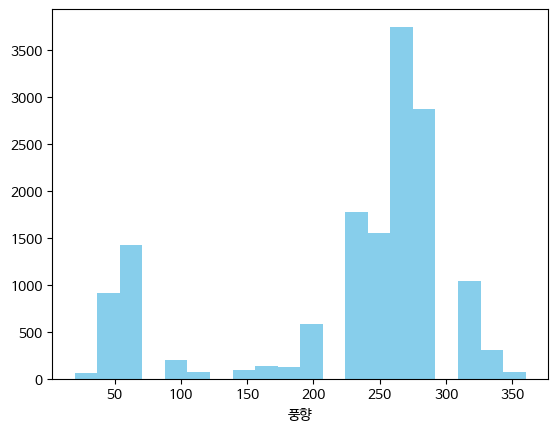

In [ ]:
#최대 풍속풍향
wind  = []
for row in data:
    if row[3] != '':
        wind.append(float(row[3]))


#x축 이름 : 풍향
plt.xlabel('풍향')
#그래프 색:skyblue, 가로축 가로축 구간의 개수;20
plt.hist(wind, color='skyblue', bins=20)

plt.show()

###(6) 표정 그리기

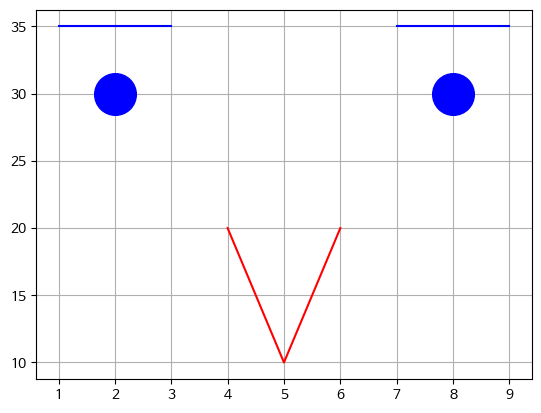

In [ ]:
plt.grid()

plt.plot([1,3], [35,35], c='b')
plt.plot([7,9], [35,35], c='b')

plt.plot([2, 8],[30, 30], 'bo', markersize=30)

plt.plot([4,5,6], [20,10,20], c='r')
plt.show()

###  (7) 1~12월의 월별 평균 풍속을 상자그림으로 비교하시오.

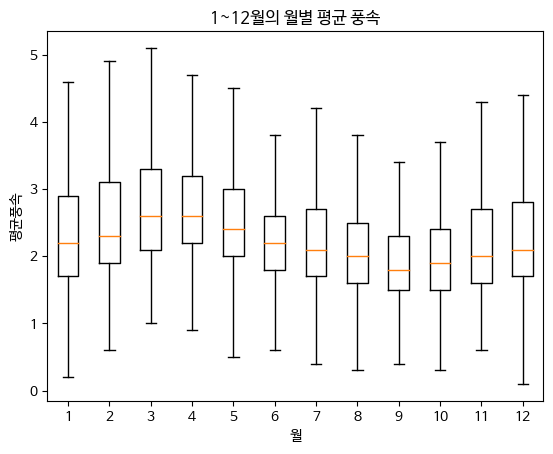

In [ ]:
#월별 평균 풍속을 비교해보자.
#[[1월], [2월],[3월], [4월]..., [12월]]
month = [[] for i in range(1, 13)]
#month[0] <= 1월 평균풍속, month[1] <= 2월 평균풍속,month[2] <= 3월 평균풍속,
for row in data:
    index = int(row[0].split('-')[1]) - 1
    if row[1] != '':
        month[index].append(float(row[1]))
#그래프 이름 :  1~12월의 월별 평균 풍속
plt.title('1~12월의 월별 평균 풍속')
#x축이름:월, y축이름:평균풍속
plt.xlabel('월')
plt.ylabel('평균풍속')

# 아웃라이어 보이기 않기
plt.boxplot(month, showfliers=False)
#그래프 보여주기
plt.show()